# Classification using Keras, tensorflow

In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
tf.__version__

'2.9.1'

In [4]:
keras.__version__

'2.9.0'

In [67]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [12]:
X_train_full.shape

(60000, 28, 28)

In [13]:
X_train_full.dtype

dtype('uint8')

In [14]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [15]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## Building the neural network model

In [21]:
model = keras.models.Sequential()
# converts each input image into a 1D array
model.add(keras.layers.Flatten(input_shape=[28, 28])) 
model.add(keras.layers.Dense(300, activation=keras.activations.relu))
model.add(keras.layers.Dense(100, activation="relu"))
# Output layer (one per class)
model.add(keras.layers.Dense(10, activation="softmax"))

In [26]:
model2 = keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(10, activation='softmax'),
    ]
)

In [ ]:
# possible variations:
from keras.layers import Dense
output_layer = Dense(10)
from tensorflow.keras.layers import Dense
output_layer = Dense(10)
from tensorflow import keras
output_layer = keras.layers.Dense(10)
from tensorflow.keras import layers
output_layer = layers.Dense(10)

In [27]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 300)               235500    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [28]:
model2.layers

In [34]:
weights, biases = model2.layers[1].get_weights()

In [38]:
weights.shape

(784, 300)

In [37]:
biases.shape

(300,)

In [39]:
model2.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"],
    )

In [42]:
history = model2.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
   1/1719 [..............................] - ETA: 4:06 - loss: 2.3754 - accuracy: 0.1562

2022-08-15 20:57:56.490224: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1719/1719 [==============================] - 2s 985us/step - loss: 0.7266 - accuracy: 0.7629 - val_loss: 0.5107 - val_accuracy: 0.8294
Epoch 2/30
1719/1719 [==============================] - 2s 909us/step - loss: 0.4909 - accuracy: 0.8293 - val_loss: 0.4516 - val_accuracy: 0.8470
Epoch 3/30
1719/1719 [==============================] - 2s 916us/step - loss: 0.4433 - accuracy: 0.8446 - val_loss: 0.4092 - val_accuracy: 0.8640
Epoch 4/30
1719/1719 [==============================] - 2s 922us/step - loss: 0.4166 - accuracy: 0.8540 - val_loss: 0.3855 - val_accuracy: 0.8722
Epoch 5/30
1719/1719 [==============================] - 2s 918us/step - loss: 0.3952 - accuracy: 0.8612 - val_loss: 0.3795 - val_accuracy: 0.8692
Epoch 6/30
1719/1719 [==============================] - 2s 944us/step - loss: 0.3790 - accuracy: 0.8673 - val_loss: 0.3804 - val_accuracy: 0.8658
Epoch 7/30
1719/1719 [==============================] - 2s 933us/step - loss: 0.3663 - accuracy: 0.8698 - val_loss: 0.3736 - val_accura

In [47]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [48]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
pd_history=pd.DataFrame(history.history)

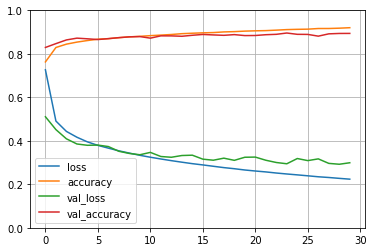

In [65]:
pd_history.plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
# Validation error is computed at the end of each epoch,
# While training error is computed using a running mean during each epoch.
# Thus, the training curve should be shifted by half an epoch to the left.

In [ ]:
# If the performance of the model is not satifying,
# Continue training (call fit() method again since Keras just continues training where it left off)

# Tune Hyperparameter
    # 1. Learning rate
    # 2. Try another optimizer
    # 3. Try tuning model hyperparameters
    #   Number of layers
    #   Number of neurons per layer
    #   Types of activation functions
    # 4. Tune batch size
    # If you are satisified with the validation accuracy, evaluate the model on the test set to estimate the 
    # generalization error before deploying the model to production.

In [68]:
model2.evaluate(X_test, y_test)

313/313 [==============================] - 0s 538us/step - loss: 61.8272 - accuracy: 0.8511


[61.827213287353516, 0.8511000275611877]

In [70]:
model2.metrics_names

['loss', 'accuracy']

In [ ]:
# Get slightly lower performance on the test set than on the validation set,
# because the hyperparameter is tuned based on the validation set.
# Do not tweak your model based on the test set, 
# as your estimation of the generalization error will be too optimistic in this case.

In [71]:
X_new = X_test[:3]

In [85]:
y_proba = model2.predict(X_new)

1/1 [==============================] - 0s 9ms/step


In [86]:
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [91]:
import numpy as np
y_pred = np.argmax(y_proba,axis=1)
y_pred

array([9, 2, 1])

In [93]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')